Importing required libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
import plotly.offline as pyoff
import plotly.graph_objs as go

In [ ]:
import plotly.graph_objs as go

In [ ]:
import pandas as pd
import io
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
train = pd.read_csv('/content/gdrive/MyDrive/fake news detection(FakeNewsNet)/fnn_train.csv')
test = pd.read_csv('/content/gdrive/MyDrive/fake news detection(FakeNewsNet)/fnn_test.csv')

In [ ]:
train = train.replace(to_replace ="fake",
                 value =1)
train = train.replace(to_replace ="real",
                 value =0)

In [ ]:
test = test.replace(to_replace ="fake",
                 value =1)
test = test.replace(to_replace ="real",
                 value =0)

In [ ]:
train = train.drop(['id','date', 'speaker', 'sources','paragraph_based_content'], axis=1)
test = test.drop(['id','date', 'speaker', 'sources','paragraph_based_content'], axis=1)


In [ ]:
# Merging title and text
train['fullText_based_content'] = train['statement'] + ' ' + train['fullText_based_content']
test['fullText_based_content'] = test['statement'] + ' ' + test['fullText_based_content']


# We can merge both together since we now have labels
final_data = pd.concat([train, test])

# Randomize the rows so its all mixed up
final_data = final_data.sample(frac=1).reset_index(drop=True)

# Drop columns not needed
final_data = final_data.drop(['statement'], axis = 1)
final_data = final_data.sample(frac=1)
final_data.head(10)

fullText_based_content  label_fnn
13397  Says President Donald Trump's travel ban could...          1
12971  The decision to remove Chick-fil-A from Emory ...          0
2936   U.S. Senate candidate David Perdue’s company t...          1
15232  "Americans will spend more on taxes in 2014 th...          0
79     Says of Georgia, "for four years in a row, we ...          0
244    "Nine million people have lower-cost HIV/AIDS ...          0
3059   “This race will be the Democrats’ top target t...          1
8353   Says he and President Barack Obama have the sa...          0
15851  "We've cut the deficit by two-thirds." Making ...          0
946    Health care reform "establishes a new board of...          1

In [ ]:


# merge them into one file
df = final_data.copy()
df = df.reset_index()
# don't forget to shuffle them. 
# Otherwise all news are on top and all fakes are on the bottom
df = df.sample(frac=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



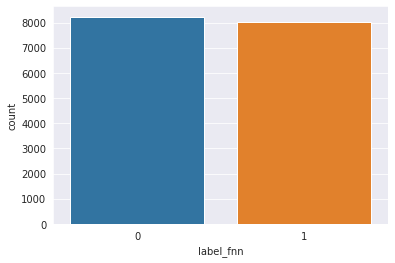

In [ ]:
sns.set_style("darkgrid")
sns.countplot(df.label_fnn)

# Data Cleaning

In [ ]:
import string
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
import string
import nltk
import re,string,unicodedata
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('stopwords')
from bs4 import BeautifulSoup
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
import nltk
nltk.download('stopwords')
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [ ]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
def rem_punctuation(text):
  return text.translate(str.maketrans('','',string.punctuation))
#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = rem_punctuation(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text
#Apply function on review column
df['fullText_based_content']=df['fullText_based_content'].apply(denoise_text)

In [ ]:
df['fullText_based_content'][0]

'opponent… city chicago payroll state illinois payroll simultaneously take full salary funding full pension benefit city worker state worker year illinois grapple billion unfunded pension debt republican comptroller leslie geissler munger seek tie opponent chicago city clerk susana mendoza problem contribute state’s pension crisis.\nduring chicago sun-times editorial debate sept munger say opponent… city chicago payroll state illinois payroll simultaneously take full salary funding full pension benefit city worker state worker years."\nmendoza fire back say statement munger’s late false allegation one previously disproven.\nbut munger campaign since double double-dipping claim mendoza take two government salary pay two public pension system call chicago democrat forgo one pensions.\nwith munger make mendoza’s pension city/state salary prominent issue comptroller race want find allegation double-dipping true.\nmendoza’s pensions\nin mendoza begin work chicago department planning develop

# Applying 5-6 algo with TF_IDF and Countvectorizer using n-gram

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
def get_prediction(vectorizer, classifier, X_train, X_test, y_train, y_test):
    pipe = Pipeline([('vector', vectorizer),
                    ('model', classifier)])
    model = pipe.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuarcy: {}".format(round(accuracy_score(y_test, y_pred)*100,2)))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix: \n", cm)
    print("Classification Report: \n", classification_report(y_test, y_pred))

In [ ]:
print("******USING STEMMED TEXT********")
X_train, X_test, y_train, y_test = train_test_split(df['fullText_based_content'], df['label_fnn'], test_size = 0.3, random_state= 0)
classifiers = [ LogisticRegression(), SGDClassifier(), MultinomialNB(), BernoulliNB(), LinearSVC(),
              KNeighborsClassifier(n_neighbors=5)]
for classifier in classifiers:
    print("\n\n", classifier)
    print("***********Usng Count Vectorizer****************")
    get_prediction(CountVectorizer(ngram_range=(1,2), max_df = 5), classifier, X_train, X_test, y_train, y_test)
    print("***********Usng TFIDF Vectorizer****************")
    get_prediction(TfidfVectorizer(ngram_range=(1,2), max_df = 5), classifier, X_train, X_test, y_train, y_test)

******USING STEMMED TEXT********


 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
***********Usng Count Vectorizer****************
Accuarcy: 63.93
Confusion Matrix: 
 [[1877  574]
 [1186 1243]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.77      0.68      2451
           1       0.68      0.51      0.59      2429

    accuracy                           0.64      4880
   macro avg       0.65      0.64      0.63      4880
weighted avg       0.65      0.64      0.63      4880

***********Usng TFIDF Vectorizer****************
Accuarcy: 63.79
Confusion Matrix: 
 [[1918  533]
 [1234 1195]]
Classification Report: 
               precision    recall  f1